<a href="https://colab.research.google.com/github/Adhira-Deogade/INFO-7374---Assignment-3/blob/master/Testing_GE_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import division
from __future__ import print_function

In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.13.1


Using TensorFlow backend.


In [0]:
ls

In [0]:
from google.colab import files

In [0]:
upload = files.upload()

In [0]:
## Our file is present, just import it

In [0]:
dataset = pd.read_csv("cleanedfinancial_data.csv")

In [4]:
dataset.head()

,Unnamed: 0,sentiment,text
0,0,neutral,"Good day, ladies and gentlemen, and welcome to..."
1,1,negative,I'm not sure. I think Model T was a little bit...
2,2,negative,"Well, we need to bring the Shanghai factory on..."
3,3,neutral,So it's - it is eligible for that. But it soun...
4,4,positive,The demand for - the demand for Model 3 is ins...


In [0]:
dataset.drop(columns="Unnamed: 0", inplace=True)

Value counts

In [6]:
dataset.sentiment.value_counts()

neutral     838
positive    654
negative    157
Name: sentiment, dtype: int64

**Data is imbalanced, therefore, we first build a logistic regression model as our base model**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
dataset.shape[0]

1649

In [9]:
dataset.iloc[2,1]

"Well, we need to bring the Shanghai factory online. I think that's the biggest driver for getting to 500K plus a year. Our car is just very expensive going into China. We've got import duties. We've got transport costs. We've got higher-cost labor here. And we've never been eligible for any of the EV tax credits. A lot of people sort of dependent on incentives. In fact, we are [indiscernible] EVs, we have the least access to incentives. It's pretty crazy because there's so many companies that - countries that have put price caps on the EV incentive, which affects Tesla. And in China, which is the biggest market for EVs, we've never had any subsidies or tax incentives for vehicles."

In [10]:
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#spell correction
# import autocorrect
# from autocorrect. import spell

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
dataset.shape

(1649, 2)

In [0]:
data = []

In [0]:
for i in range(dataset.shape[0]):
    sms = dataset.iloc[i, 1]

    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)

    # make words lowercase, because Go and go will be considered as two words
    sms = sms.lower()

    # tokenising
    tokenized_sms = wt(sms)

    # remove stop words and stemming
 
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(stemmer.stem(word))

    sms_text = " ".join(sms_processed)
    data.append(sms_text)

In [14]:
len(data)

1649

In [17]:
dataset.iloc[1,1]

"I'm not sure. I think Model T was a little bit slower, but I'm not 100% sure."

In [18]:
data

['good day ladi gentlemen welcom tesla inc q financi result q webcast time particip listen mode later conduct question answer session instruct follow time oper instruct remind confer record',
 'sure think model littl bit slower sure',
 'well need bring shanghai factori onlin think biggest driver get k plu year car expens go china got import duti got transport cost got higher cost labor never elig ev tax credit lot peopl sort depend incent fact indiscern ev least access incent pretti crazi mani compani countri put price cap ev incent affect tesla china biggest market ev never subsidi tax incent vehicl',
 'elig sound like go reduc china come year realli bottom line need shanghai factori achiev k rate car afford',
 'demand demand model insan high inhibitor afford like peopl liter money buy car got noth desir enough money bank account car made afford demand extraordinari',
 'next question come pierr ferragu new street research',
 'deepak wonder get concern potenti recess wonder think would

In [19]:
len(data)

1649

In [0]:
mydf = pd.DataFrame(data=data,columns=['text'])

In [26]:
mydf.head()

,text
0,good day ladi gentlemen welcom tesla inc q fin...
1,sure think model littl bit slower sure
2,well need bring shanghai factori onlin think b...
3,elig sound like go reduc china come year reall...
4,demand demand model insan high inhibitor affor...


In [0]:
mydf['sentiment'] = dataset.sentiment

In [28]:
mydf.head()

,text,sentiment
0,good day ladi gentlemen welcom tesla inc q fin...,neutral
1,sure think model littl bit slower sure,negative
2,well need bring shanghai factori onlin think b...,negative
3,elig sound like go reduc china come year reall...,neutral
4,demand demand model insan high inhibitor affor...,positive


In [30]:
mydf.shape

(1649, 2)

In [0]:
mydf.to_csv("justcsv.csv")

In [0]:
from google.colab import files
files.download("justcsv.csv")

In [36]:
dataset.iloc[:, 0]

0        neutral
1       negative
2       negative
3        neutral
4       positive
5        neutral
6        neutral
7       positive
8       positive
9       positive
10      positive
11       neutral
12      positive
13       neutral
14      positive
15      negative
16      negative
17      negative
18       neutral
19       neutral
20      negative
21      positive
22       neutral
23      positive
24      positive
25      negative
26      positive
27      positive
28       neutral
29       neutral
          ...   
1619    negative
1620     neutral
1621     neutral
1622     neutral
1623    negative
1624     neutral
1625    positive
1626    positive
1627    positive
1628     neutral
1629    positive
1630     neutral
1631    positive
1632    negative
1633     neutral
1634    positive
1635     neutral
1636     neutral
1637     neutral
1638     neutral
1639    positive
1640     neutral
1641    negative
1642     neutral
1643     neutral
1644    negative
1645    negative
1646    negati

In [0]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
# matrix = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))

tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)
y = dataset.iloc[:, 0]


In [0]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
ls

 cleanedfinancial_data.csv  'justcsv (1).csv'   Team3_Facebook.json
 FinalFiles/                 justcsv.csv
 GE.csv                      sample_data/


In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [43]:
y.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [45]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.13.1


In [0]:

train_posts = X_train
train_tags =y_train

test_posts = X_test
test_tags = y_test

In [0]:
max_words = 2000

In [0]:

# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [49]:
y_train

array([1, 0, 1, ..., 1, 2, 0])

In [0]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [51]:
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [0]:
x_train = X_train
x_test = X_test

In [53]:

# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1319, 1949)
x_test shape: (330, 1949)
y_train shape: (1319, 3)
y_test shape: (330, 3)


In [0]:
### Grid Search

In [0]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
  model = Sequential()
  model.add(Dense(512,input_shape=(1949,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])
  return model



In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [0]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=80, verbose=0)

In [0]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [56]:
model = Sequential()
model.add(Dense(512,input_shape=(1949,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
 model.compile(loss='categorical_crossentropy',
               optimizer='Adagrad',
               metrics=['accuracy'])

In [58]:
history = model.fit(x_train, y_train,
                    batch_size=80,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 1187 samples, validate on 132 samples
Epoch 1/5
1187/1187 [==============================] - 1s 853us/step - loss: 0.8974 - acc: 0.6436 - val_loss: 0.8174 - val_acc: 0.6818
Epoch 2/5
1187/1187 [==============================] - 0s 88us/step - loss: 0.4219 - acc: 0.8703 - val_loss: 0.8356 - val_acc: 0.6742
Epoch 3/5
1187/1187 [==============================] - 0s 79us/step - loss: 0.2645 - acc: 0.9242 - val_loss: 0.8832 - val_acc: 0.6818
Epoch 4/5
1187/1187 [==============================] - 0s 84us/step - loss: 0.1784 - acc: 0.9621 - val_loss: 0.9422 - val_acc: 0.6894
Epoch 5/5
1187/1187 [==============================] - 0s 87us/step - loss: 0.1359 - acc: 0.9739 - val_loss: 0.9687 - val_acc: 0.6667


In [59]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=80, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

330/330 [==============================] - 0s 71us/step
Test score: 0.9216332760724154
Test accuracy: 0.6848484873771667


In [0]:

y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [0]:
text_labels = encoder.classes_ 

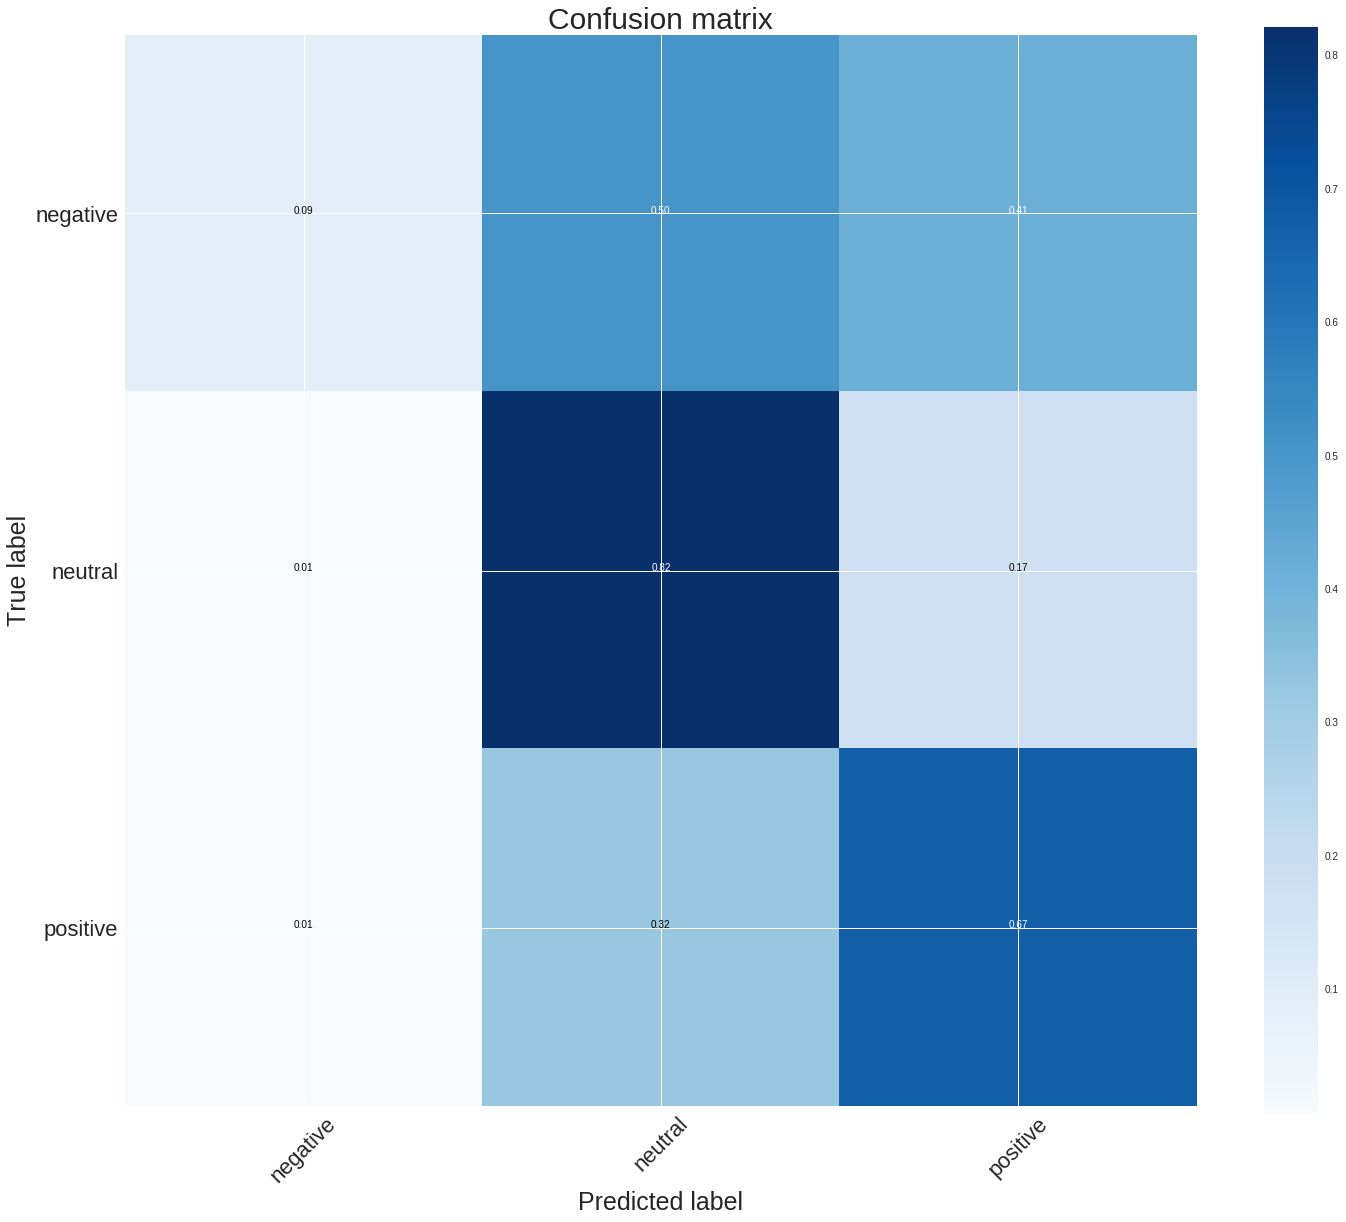

In [63]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [0]:
from sklearn.metrics import f1_score

In [65]:
f1_score(y_test_1d, y_pred_1d, average='macro')

0.5266112192724499

In [0]:
mydf = pd.read_csv("GE.csv")

In [0]:
# mydf.iloc[:, 1]

In [0]:
matrix = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
Xge = matrix.fit_transform(mydf.text).toarray()
yge = mydf.iloc[:, 1]

In [0]:
encoder = LabelEncoder()
encoder.fit(yge)

yge = encoder.transform(yge)

In [0]:
# Converts the labels to a one-hot representation
num_classes = np.max(yge) + 1

yge = utils.to_categorical(yge, num_classes)

In [73]:
y_softmax = model.predict(Xge)

y_test_1d = []
y_pred_1d = []

for i in range(len(yge)):
    probs = yge[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

ValueError: ignored

In [0]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [0]:
tokenize.fit_on_texts(mydf.text) # only fit on train

xge = tokenize.texts_to_matrix(mydf.text)

In [76]:
xge

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:

# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)